 ## Sections ##                                               
- ### Exploratory Data Analysis ###
   
 - [Missing Value](#Missing Value Treatment) 

 - [Univariate Analysis](#Univariate Analysis)
   - *Continuous Variables*
   - *Categorical Variables*
  
 - [Bi-variate Analysis](#Bi-variate Analysis)
   - *Categorical & Continuous*
   - *Categorical & Categorical*
 - [Outlier](#Outlier)
- ### Data Preparation ###
 - [Label encoding](#Label encoding)
 - [Dummy variables](#Dummy Variables)
 - [Spliting the data](#Data Spliting)                                                                                      
 
- ### Machine Learning ###
 - [Regression](#Regression)
 - [Decision Tree](#Decision Tree)
 - [Random Forest](#Random Forest)
 - [Gredient Boosting with H2O](#Gredient Boosting with H2O)
 - [Deep Learning with H2O](#Deep Learning with H2O)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy import stats

In [2]:
train=pd.read_csv("G:/Black Friday/train.csv")
test=pd.read_csv("G:/Black Friday/test-comb.csv")
test1 = test
test.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Comb
0,0,1000004,P00128942,M,46-50,7,B,2,0,1,11,NaN,1000004P00128942
1,1,1000009,P00113442,M,26-35,17,C,0,0,3,5,NaN,1000009P00113442
2,2,1000010,P00288442,F,36-45,1,B,4+,0,5,14,NaN,1000010P00288442
3,3,1000010,P00145342,F,36-45,1,B,4+,0,4,9,NaN,1000010P00145342
4,4,1000011,P00053842,F,26-35,1,C,1,0,4,5,12,1000011P00053842


In [9]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1003028.842401,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1727.591586,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1000001.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1001516.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1003077.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1004478.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1006040.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [16]:
train.isnull().values.any()

True

In [18]:
train.dtypes         ## Find data types

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 44.1+ MB


<a id='Missing Value Treatment'></a>
## Missing Value Treatment ##
 
***Why missing values treatment is required?***

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

***Why my data has missing values?***

We looked at the importance of treatment of missing values in a dataset. Now, let’s identify the reasons for occurrence of these missing values. They may occur at two stages:

**Data Extraction**: It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.

**Data collection**: These errors occur at time of data collection and are harder to correct. They can be categorized in four types:

1)**Missing completely at random**: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.

2)**Missing at random**: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.

3)**Missing that depends on unobserved predictors**: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.

4)**Missing that depends on the missing value itself**: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.
 
***Which are the methods to treat missing values ?**

**Deletion**:  It is of two types: List Wise Deletion and Pair Wise Deletion.
In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.
In pair wise deletion, we perform analysis with all cases in which the variables of interest are present. Advantage of this method is, it keeps as many cases available for analysis. One of the disadvantage of this method, it uses different sample size for different variables.

Deletion methods are used when the nature of missing data is “Missing completely at random” else non random missing values can bias the model output.

**Mean/ Mode/ Median Imputation**: Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. It can be of two types:- ***Generalized Imputation***: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median. Like in above table, variable “Manpower” is missing so we take average of all non missing values of “Manpower”  (28.33) and then replace missing value with it.
Similar case Imputation: In this case, we calculate average for gender “Male” (29.75) and “Female” (25) individually of non missing values then replace the missing value based on gender. For “Male“, we will replace missing values of manpower with 29.75 and for “Female” with 25.

**Prediction Model**:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data. In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.We can use regression, ANOVA, Logistic regression and various modeling technique to perform this. There are 2 drawbacks for this approach:
1)The model estimated values are usually more well-behaved than the true values
2)If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

**KNN Imputation**: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

*Advantages*:
k-nearest neighbour can predict both qualitative & quantitative attributes Creation of predictive model for each attribute with missing data is not required Attributes with multiple missing values can be easily treated Correlation structure of the data is taken into consideration

*Disadvantage*:
KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

After dealing with missing values, the next task is to deal with outliers. Often, we tend to neglect outliers while building models. This is a discouraging practice. Outliers tend to make your data skewed and reduces accuracy. Let’s learn more about outlier treatment.

 


In [20]:
train.isnull().sum()   ## Find number of NA in each colunm

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [69]:
train.isnull().sum().sum()  # Total NA in data

556885

In [4]:
train['Product_Category_2'].median()                    ## Find median of Product_Category_2 to fill NA

9.0

In [3]:
train['Product_Category_2'].fillna(value=9,inplace=True)            ## Filling NA for Product_Category_2

In [71]:
train['Product_Category_3'].median()                 ## Find median of Product_Category_2 to fill NA

14.0

In [4]:
train['Product_Category_3'].fillna(value=14,inplace=True)    ## Filling NA for Product_Category_2

In [120]:
train.isnull().sum().sum()    ## There are no NA in the train data

0

In [16]:
test.isnull().sum()    ## Find NA in test data

Unnamed: 0                         0
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
Comb                               0
dtype: int64

In [5]:
test['Product_Category_3'].median() ## median to fill the NA in test product category 3 colunm

14.0

In [5]:
test['Product_Category_3'].fillna(value=14,inplace=True)  ## fill NA by median

In [75]:
test['Product_Category_2'].median() ## median to fill the NA in test product category 3 colunm

9.0

In [6]:
test['Product_Category_2'].fillna(value=9,inplace=True)  ## fill NA by median

In [35]:
test.isnull().sum()  ## No NA in test data

Unnamed: 0                    0
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Comb                          0
dtype: int64

In [55]:
train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9,14,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9,14,1422


In [57]:
train.shape

(550068, 12)

In [7]:
## Find Unique value in Product ID

train.User_ID.nunique()

5891

In [62]:
## Number of unique in Product ID

train.Product_ID.nunique()      ## There are 3631 unique product ID outof 550068 observations

3631

In [65]:
## Number of Categorical variable

(train.dtypes=='object').sum()  ## There are 5 categorical variables

5

In [67]:
## Find colunm difference in test & train

set(test.columns).difference(set(train.columns))

{'Comb', 'Unnamed: 0'}

<a id='Univariate Analysis'></a>
## Univariate Analysis ##

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

**Continuous Variables**:- In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods like ** Histogram & Boxplot **.
We will use Matplotlib & Seaborn package.

In [8]:
## which continuous variables in data

train.dtypes  ## data types of variables

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [15]:
(train.dtypes=='int64').sum()                 # there are 5 variables which have integer as dtype

5

In [3]:
(train.dtypes=='float64').sum()               # there are 5 variables which have float as dtype

2

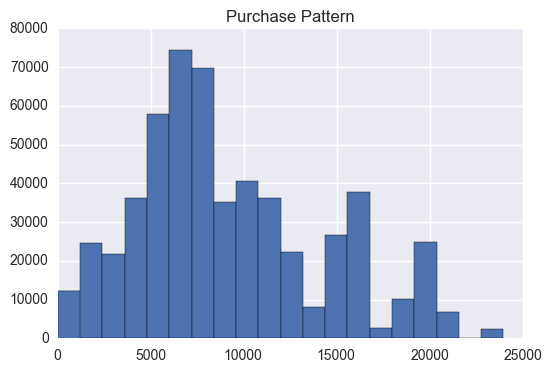

In [25]:
# Check the distribution of dependent variable i.e Purchase

train['Purchase'].hist(bins=20).set_title('Purchase Pattern')

Looking at Purchase Pattern we can see that number of count is more at 6000 & 7000 and above 15000 have very less count.

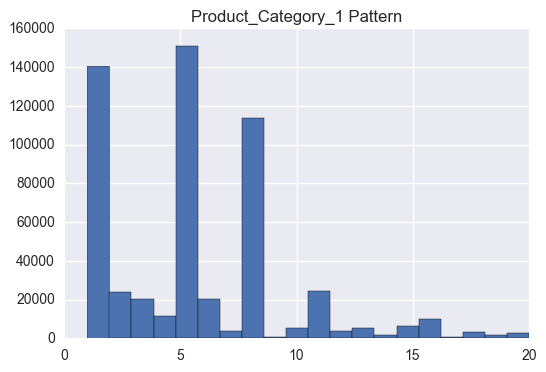

In [9]:
# Check the distribution of dependent variable i.e Purchase

train['Product_Category_1'].hist(bins=20).set_title('Product_Category_1 Pattern')

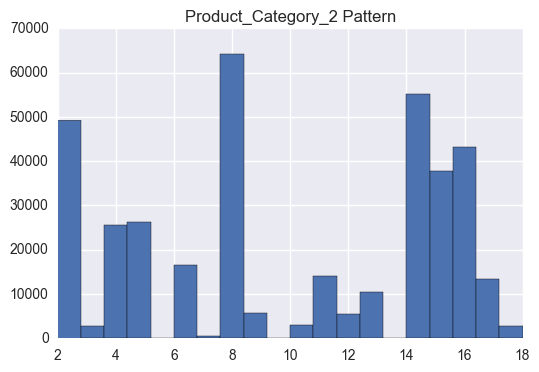

In [10]:
# Check the distribution of Product_Category_2 

train['Product_Category_2'].hist(bins=20).set_title('Product_Category_2 Pattern')

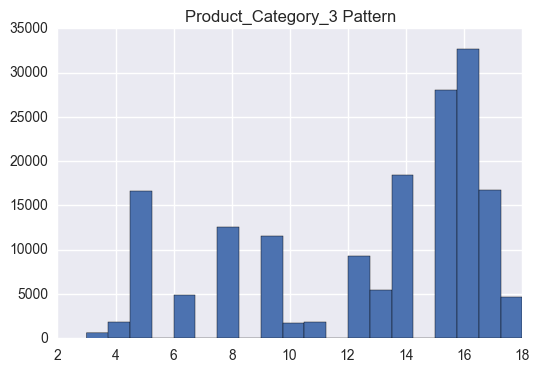

In [11]:
# Check the distribution of Product_Category_3 

train['Product_Category_3'].hist(bins=20).set_title('Product_Category_3 Pattern')

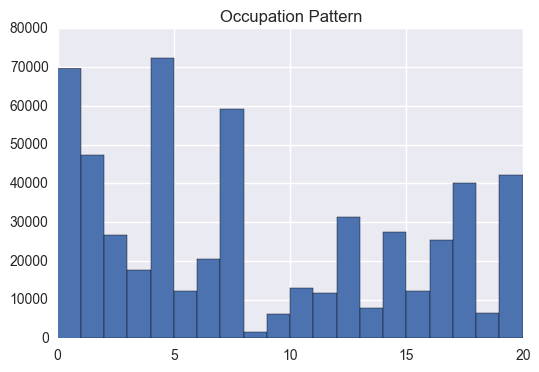

In [12]:
# Check the distribution of Occupation

train['Occupation'].hist(bins=20).set_title('Occupation Pattern')

**Categorical Variables**:- For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

In [13]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

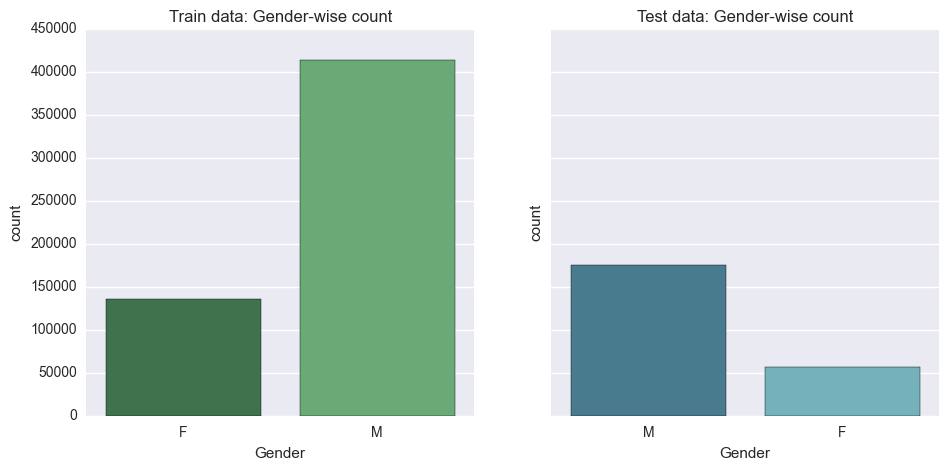

In [55]:
# Number of Gender count

dim = (11,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=dim)

sns.countplot(x="Gender", data=train, palette="Greens_d",ax=ax1).set_title('Train data: Gender-wise count');
sns.countplot(x='Gender',data=test,palette="GnBu_d",ax=ax2).set_title('Test data: Gender-wise count')

                                    There are more Males who are purchasing in this data

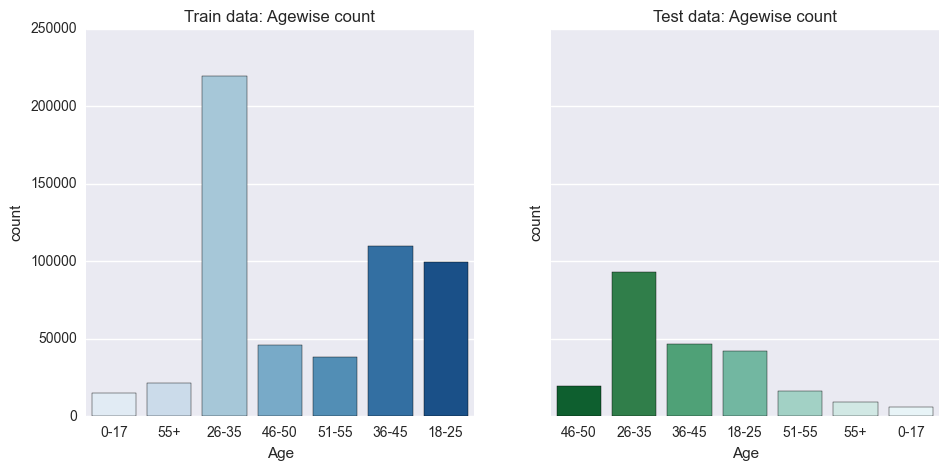

In [54]:
## Number of count of Age

dim = (11,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=dim)

sns.countplot(x='Age',data=train,palette="Blues",ax=ax1).set_title('Train data: Agewise count');
sns.countplot(x='Age',data=test,palette="BuGn_r",ax=ax2).set_title('Test data: Agewise count')


                       There are many count in Age 26-35 and very less in 0-17 in train & test data

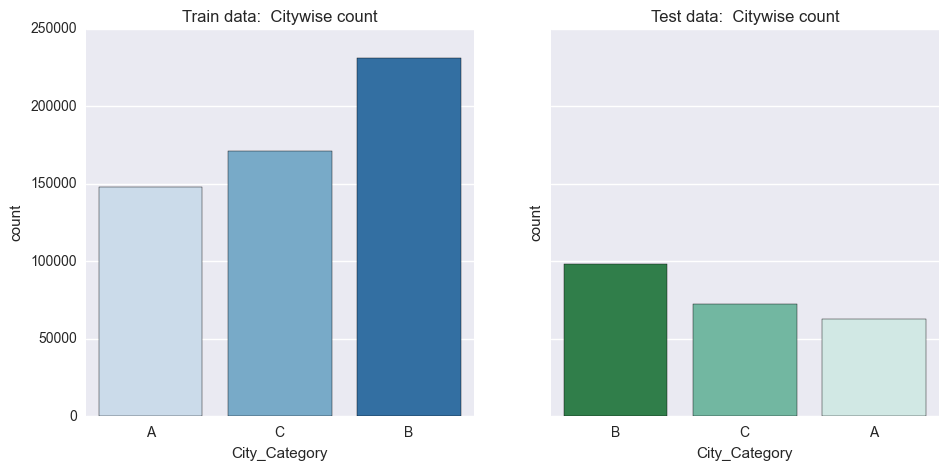

In [53]:
## Number of count of City

dim = (11,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=dim)

sns.countplot(x='City_Category',data=train,palette="Blues",ax=ax1).set_title('Train data:  Citywise count');
sns.countplot(x='City_Category',data=test,palette="BuGn_r",ax=ax2).set_title('Test data:  Citywise count')


                                       People from City B are purchasing more

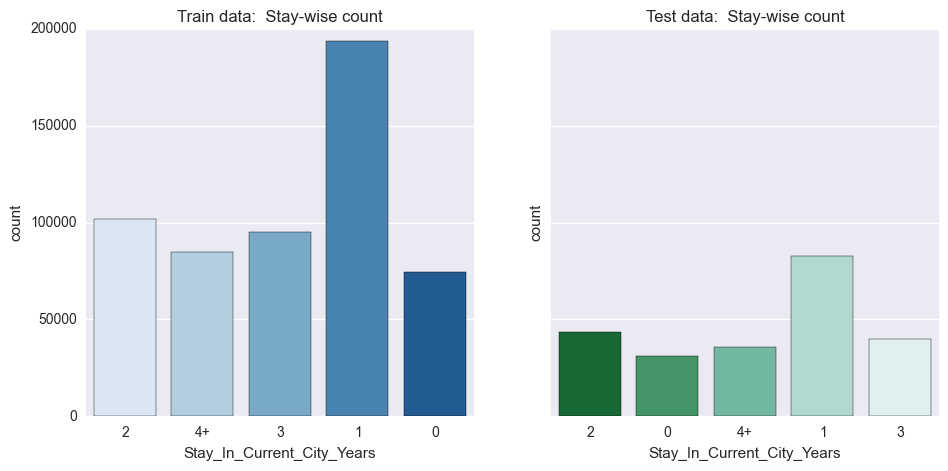

In [56]:
## Number of count of stay

dim = (11,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=dim)

sns.countplot(x='Stay_In_Current_City_Years',data=train,palette="Blues",ax=ax1).set_title('Train data:  Stay-wise count');
sns.countplot(x='Stay_In_Current_City_Years',data=test,palette="BuGn_r",ax=ax2).set_title('Test data:  Stay-wise count')


                             People who have stayed for 1 year are purching more compared to others

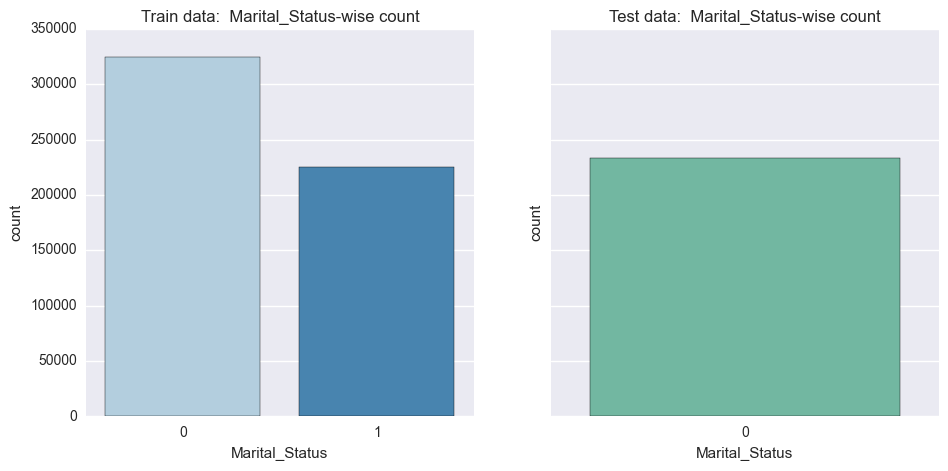

In [57]:
## Number of count of Marital_Status

dim = (11,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=dim)

sns.countplot(x='Marital_Status',data=train,palette="Blues",ax=ax1).set_title('Train data:  Marital_Status-wise count');
sns.countplot(x='Marital_Status',data=test,palette="BuGn_r",ax=ax2).set_title('Test data:  Marital_Status-wise count')


                                     There are no people who are married in Test data

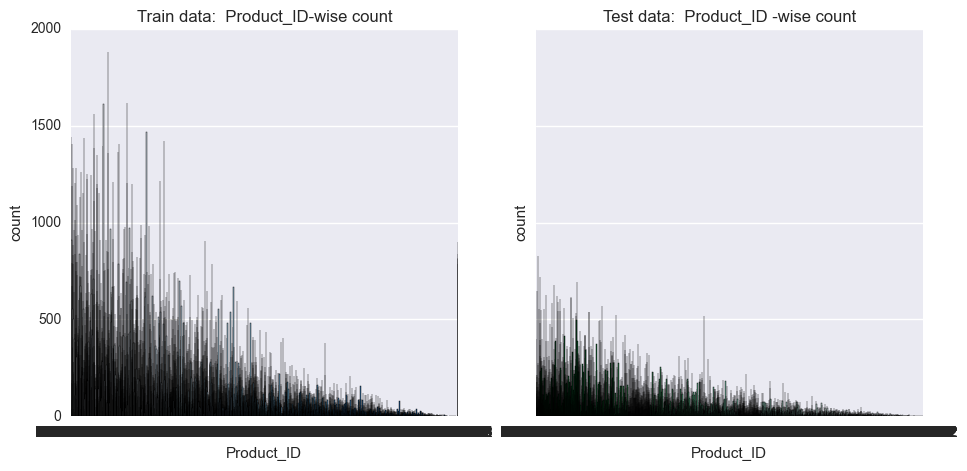

In [61]:
## Number of count of Product_ID 

dim = (11,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=dim)

sns.countplot(x='Product_ID',data=train,palette="Blues",ax=ax1).set_title('Train data:  Product_ID-wise count');
sns.countplot(x='Product_ID',data=test,palette="BuGn_r",ax=ax2).set_title('Test data:  Product_ID -wise count')


<a id='Bi-variate Analysis'></a>
## Bi-variate Analysis ##

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

Let’s understand the possible combinations in detail:

**Continuous & Continuous**: While doing bi-variate analysis between two continuous variables, we should look at **scatter plot**. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.

In [62]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

  *** There are no Continuous variable in our data set ***

**Categorical & Continuous**: While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA.

1) *Z-Test/ T-Test*:- Either test assess whether mean of two groups are statistically different from each other or not.

***If the probability of Z is small then the difference of two averages is more significant**. The T-test is very similar to Z-test but it is used when number of observation for both categories is less than 30.

2) *ANOVA*:- It assesses whether the average of more than two groups is statistically different.

Example: Suppose, we want to test the effect of five different exercises. For this, we recruit 20 men and assign one type of exercise to 4 men (5 groups). Their weights are recorded after a few weeks. We need to find out whether the effect of these exercises on them is significantly different or not. This can be done by comparing the weights of the 5 groups of 4 men each.


In [7]:
from scipy import stats

In [17]:
gender_grp = train.groupby(['Gender'])
gender_grp['Purchase'].describe()

Gender       
F       count    135809.000000
        mean       8734.565765
        std        4767.233289
        min          12.000000
        25%        5433.000000
        50%        7914.000000
        75%       11400.000000
        max       23959.000000
M       count    414259.000000
        mean       9437.526040
        std        5092.186210
        min          12.000000
        25%        5863.000000
        50%        8098.000000
        75%       12454.000000
        max       23961.000000
dtype: float64

OrderedDict([('F', <matplotlib.axes._subplots.AxesSubplot at 0xaceb710>),
             ('M', <matplotlib.axes._subplots.AxesSubplot at 0xad10810>)])

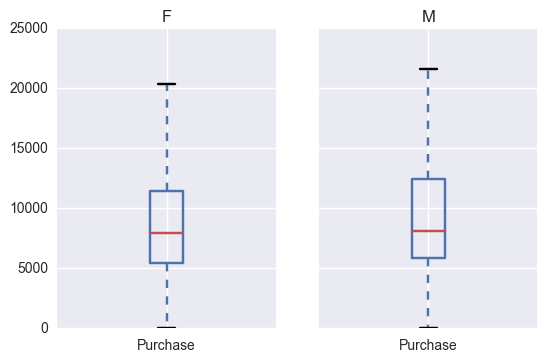

In [35]:
gender_grp.boxplot(column=['Purchase'],return_type='axes')

**Boxplot shows Female & Male are not significantly different but we will check by Hypothesis**

In [11]:
# make purchase data for hypotheis of Female & Male to find out either F & M are significantly different

M_purchase = train[train['Gender']=='F']['Purchase']
F_purchase = train[train['Gender']=='M']['Purchase']

In [16]:
stats.ttest_ind(M_purchase, F_purchase,equal_var=False)  ## equal_var means if True means they have same sd 

Ttest_indResult(statistic=-46.358248669626064, pvalue=0.0)

**By doing Hypothesis we can say that they have mean purchase difference i.e they are significant**

In [36]:
stats.f_oneway(M_purchase, F_purchase)

F_onewayResult(statistic=2010.4424717229219, pvalue=0.0)

OrderedDict([('0-17', <matplotlib.axes._subplots.AxesSubplot at 0x16b51490>),
             ('18-25', <matplotlib.axes._subplots.AxesSubplot at 0x12029790>),
             ('26-35', <matplotlib.axes._subplots.AxesSubplot at 0x147f29d0>),
             ('36-45', <matplotlib.axes._subplots.AxesSubplot at 0x14816bb0>),
             ('46-50', <matplotlib.axes._subplots.AxesSubplot at 0x14844390>),
             ('51-55', <matplotlib.axes._subplots.AxesSubplot at 0x14864550>),
             ('55+', <matplotlib.axes._subplots.AxesSubplot at 0x1488d830>)])

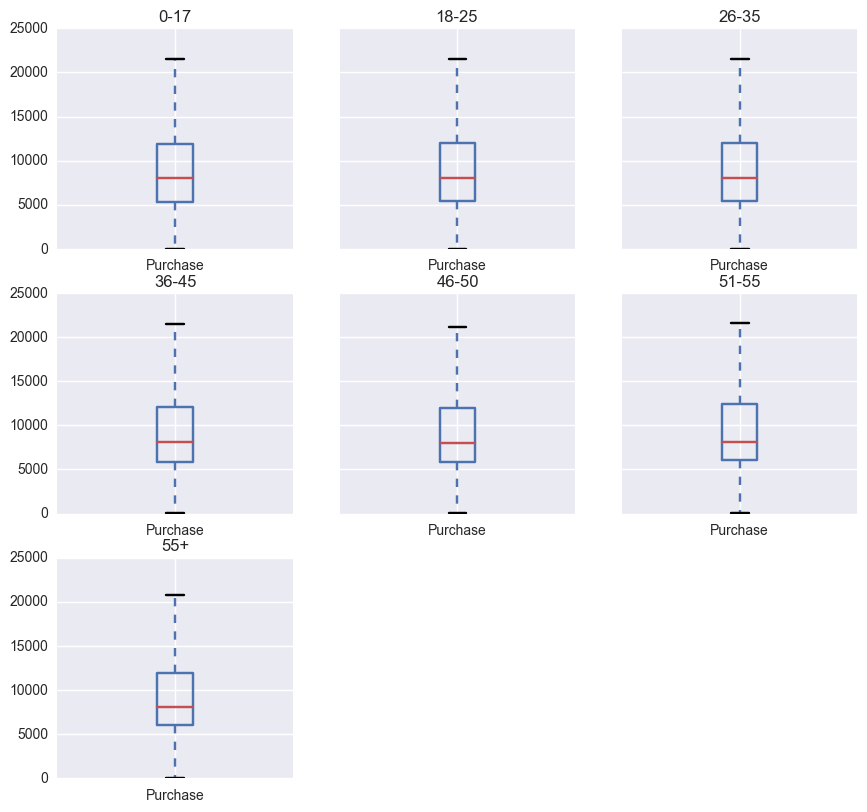

In [46]:
## Age wise hypothesis

age_grp = train.groupby(['Age'])
age_grp.boxplot(column=['Purchase'],return_type='axes',figsize=(10,10))

In [47]:
age_grp['Purchase'].describe()


Age         
0-17   count     15102.000000
       mean       8933.464640
       std        5111.114046
       min          12.000000
       25%        5328.000000
       50%        7986.000000
       75%       11874.000000
       max       23955.000000
18-25  count     99660.000000
       mean       9169.663606
       std        5034.321997
       min          12.000000
       25%        5415.000000
       50%        8027.000000
       75%       12028.000000
       max       23958.000000
26-35  count    219587.000000
       mean       9252.690633
       std        5010.527303
       min          12.000000
       25%        5475.000000
       50%        8030.000000
       75%       12047.000000
       max       23961.000000
36-45  count    110013.000000
       mean       9331.350695
       std        5022.923879
       min          12.000000
       25%        5876.000000
       50%        8061.000000
       75%       12107.000000
       max       23960.000000
46-50  count     45701.0000

In [67]:
## subset the data as per levels from Age

p_0to17 = train[train['Age']=='0-17']['Purchase']
p_18to25 = train[train['Age']=='18-25']['Purchase']
p_26to35 = train[train['Age']=='26-35']['Purchase']
p_36to45 = train[train['Age']=='36-45']['Purchase']
p_46to50 = train[train['Age']=='46-50']['Purchase']
p_51to55 = train[train['Age']=='51-55']['Purchase']
p_55 = train[train['Age']=='55+']['Purchase']


In [71]:
## Test the anova

stats.f_oneway(p_0to17,p_18to25,p_26to35,p_36to45,p_46to50,p_51to55,p_55)

F_onewayResult(statistic=40.575799094476636, pvalue=1.0535639393779301e-49)

*Age groups have different purchase mean,so we will consider this Age variable for model building*

In [75]:
grp_marital = train.groupby(['Marital_Status'])
grp_marital['Purchase'].describe()

Marital_Status       
0               count    324731.000000
                mean       9265.907619
                std        5027.347859
                min          12.000000
                25%        5605.000000
                50%        8044.000000
                75%       12061.000000
                max       23961.000000
1               count    225337.000000
                mean       9261.174574
                std        5016.897378
                min          12.000000
                25%        5843.000000
                50%        8051.000000
                75%       12042.000000
                max       23961.000000
dtype: float64

OrderedDict([(0, <matplotlib.axes._subplots.AxesSubplot at 0x17e75450>),
             (1, <matplotlib.axes._subplots.AxesSubplot at 0x1992efd0>)])

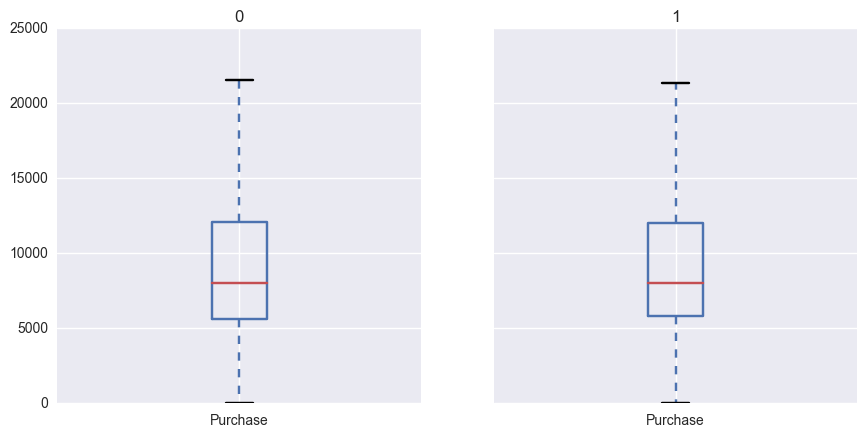

In [82]:
grp_marital.boxplot(column=['Purchase'],return_type='axes',figsize=(10,5))

In [73]:
## subset Marital status

m0 = train[train['Marital_Status']== 0]['Purchase']
m1 = train[train['Marital_Status']== 1]['Purchase']

## Test Anova 
stats.f_oneway(m0,m1)

F_onewayResult(statistic=0.11810893508404011, pvalue=0.7310947527811853)

*As we show above at Univariate analysis that Marital_Status = 1 is not present in Test data so we have decided to remove Marital_Status= 1 from Train data but after doing Bivariate analysis we have found out that Marital Status groups 1 & 0 are not significantly different from one another they have equal purchase mean so while doing regression we will not consider this variable for model building.*

In [83]:
city_grp = train.groupby(['City_Category'])
city_grp['Purchase'].describe()

City_Category       
A              count    147720.000000
               mean       8911.939216
               std        4892.115238
               min          12.000000
               25%        5403.000000
               50%        7931.000000
               75%       11786.000000
               max       23961.000000
B              count    231173.000000
               mean       9151.300563
               std        4955.496566
               min          12.000000
               25%        5460.000000
               50%        8005.000000
               75%       11986.000000
               max       23960.000000
C              count    171175.000000
               mean       9719.920993
               std        5189.465121
               min          12.000000
               25%        6031.500000
               50%        8585.000000
               75%       13197.000000
               max       23961.000000
dtype: float64

OrderedDict([('A', <matplotlib.axes._subplots.AxesSubplot at 0x1d90fab0>),
             ('B', <matplotlib.axes._subplots.AxesSubplot at 0x1d941630>),
             ('C', <matplotlib.axes._subplots.AxesSubplot at 0x1d970510>)])

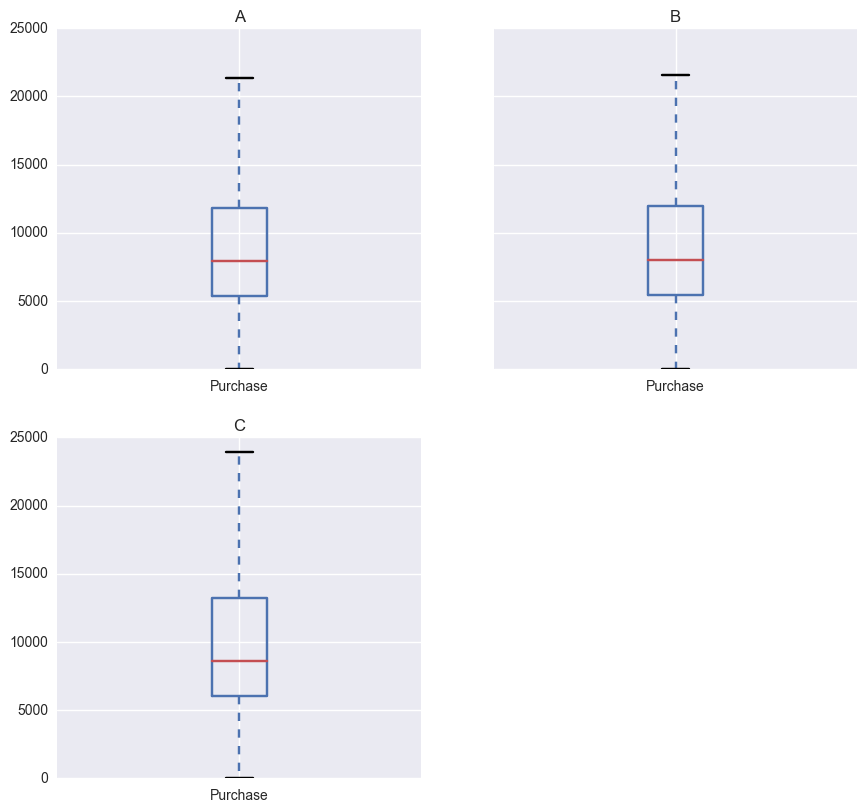

In [87]:
city_grp.boxplot(column=['Purchase'],return_type='axes',figsize=(10,10))

In [89]:
# Subset City_Category
city_A = train[train['City_Category']=='A']['Purchase']
city_B = train[train['City_Category']=='B']['Purchase']
city_C = train[train['City_Category']=='C']['Purchase']

# Test ANOVA
stats.f_oneway(city_A,city_B,city_C)

F_onewayResult(statistic=1130.7459610101932, pvalue=0.0)

*City_Category variables groups have signifiacntly different purchase mean, we can take this variable for analysis.*

In [91]:
# group Stay_In_Current_City_Years
grp_yrs = train.groupby(['Stay_In_Current_City_Years'])
grp_yrs['Purchase'].describe()

Stay_In_Current_City_Years       
0                           count     74398.000000
                            mean       9180.075123
                            std        4990.479940
                            min          12.000000
                            25%        5480.000000
                            50%        8025.000000
                            75%       11990.000000
                            max       23960.000000
1                           count    193821.000000
                            mean       9250.145923
                            std        5027.476933
                            min          12.000000
                            25%        5500.000000
                            50%        8041.000000
                            75%       12042.000000
                            max       23961.000000
2                           count    101838.000000
                            mean       9320.429810
                            std        5044.5882

OrderedDict([('0', <matplotlib.axes._subplots.AxesSubplot at 0x3075ac10>),
             ('1', <matplotlib.axes._subplots.AxesSubplot at 0x30793ed0>),
             ('2', <matplotlib.axes._subplots.AxesSubplot at 0x307c2610>),
             ('3', <matplotlib.axes._subplots.AxesSubplot at 0x307e0a70>),
             ('4+', <matplotlib.axes._subplots.AxesSubplot at 0x30808df0>)])

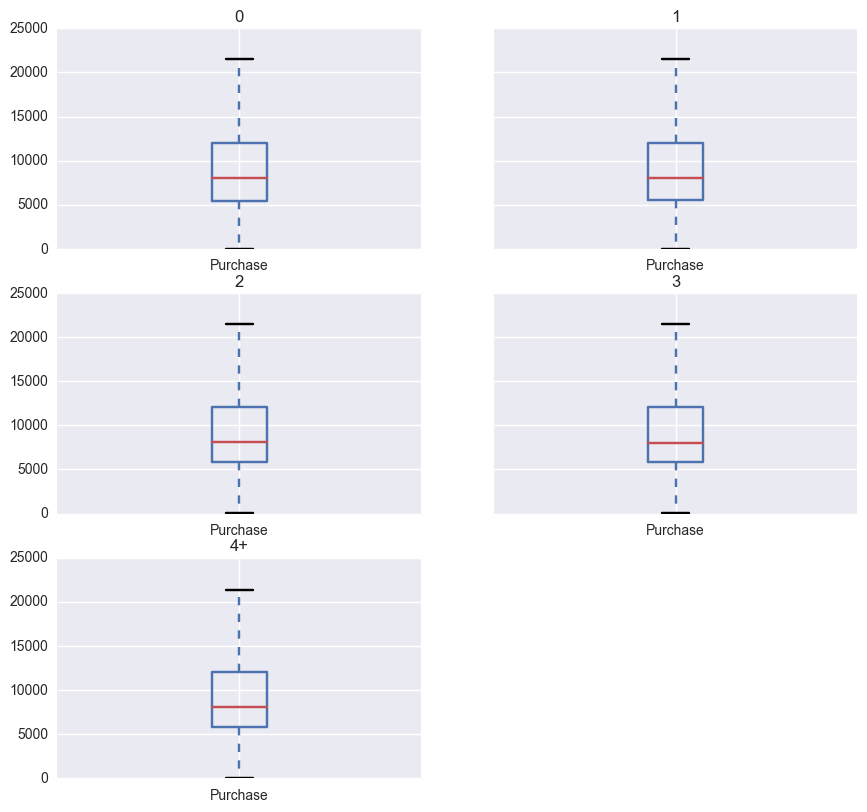

In [93]:
grp_yrs.boxplot(column=['Purchase'],return_type='axes',figsize=(10,10))

In [100]:
# subset Stay_In_Current_City_Years

yr0 = train[train['Stay_In_Current_City_Years']=='0']['Purchase']
yr1 = train[train['Stay_In_Current_City_Years']=='1']['Purchase']
yr2 = train[train['Stay_In_Current_City_Years']=='2']['Purchase']
yr3 = train[train['Stay_In_Current_City_Years']=='3']['Purchase']
yr4 = train[train['Stay_In_Current_City_Years']=='4+']['Purchase']

# test anova
stats.f_oneway(yr0,yr1,yr2,yr3,yr4)

F_onewayResult(statistic=9.3826553466316387, pvalue=1.4011435778769864e-07)

*Stay_In_Current_City_Years groups have same purchase mean*

In [103]:
# group Product_ID 
grp_pid = train.groupby(['Product_ID'])
grp_pid['Purchase'].describe()

Product_ID       
P00000142   count     1152.000000
            mean     11143.642361
            std       2305.175261
            min       2725.000000
            25%      10591.750000
            50%      10927.000000
            75%      13379.250000
            max      13716.000000
P00000242   count      376.000000
            mean     10551.851064
            std       3170.603417
            min       3214.000000
            25%       9588.000000
            50%      10023.000000
            75%      13029.000000
            max      16503.000000
P00000342   count      244.000000
            mean      5313.422131
            std       1824.925693
            min       1727.000000
            25%       3702.750000
            50%       5287.000000
            75%       6928.750000
            max       8896.000000
P00000442   count       92.000000
            mean      4795.358696
            std       1664.088125
            min       1764.000000
            25%       3599.750

In [106]:
# subset Product ID

p1 = train[train['Product_ID']=='P00000142']['Purchase']
p2 = train[train['Product_ID']=='P00000242']['Purchase']
p3 = train[train['Product_ID']=='P00000342']['Purchase']
p4 = train[train['Product_ID']=='P00000442']['Purchase']
p5 = train[train['Product_ID']=='P0099642']['Purchase']
p6 = train[train['Product_ID']=='P0099742']['Purchase']
p7 = train[train['Product_ID']=='P0099842']['Purchase']
p8 = train[train['Product_ID']=='P0099942']['Purchase']

# test anova
stats.f_oneway(p1,p2,p3,p4,p5,p6,p7,p8)

F_onewayResult(statistic=267.6805968645873, pvalue=9.8438891528934449e-286)

*Product ID groups have significant difference in purchase mean*

In [112]:
# group Product_Category_1
grp_cat1 = train.groupby(['Product_Category_1'])
grp_cat1['Purchase'].describe()

Product_Category_1       
1                   count    140378.000000
                    mean      13606.218596
                    std        4298.834894
                    min        3790.000000
                    25%       11546.000000
                    50%       15245.000000
                    75%       15812.000000
                    max       19708.000000
2                   count     23864.000000
                    mean      11251.935384
                    std        3570.642713
                    min        3176.000000
                    25%        9645.750000
                    50%       12728.500000
                    75%       13212.000000
                    max       16504.000000
3                   count     20213.000000
                    mean      10096.705734
                    std        2824.626957
                    min        2638.000000
                    25%        8198.000000
                    50%       10742.000000
                    75%     

In [115]:
# group Product_Category_2
grp_cat2 = train.groupby(['Product_Category_2'])
grp_cat2['Purchase'].describe()


Product_Category_2       
2                   count    49217.000000
                    mean     13619.356401
                    std       4275.570831
                    min       3790.000000
                    25%      11551.000000
                    50%      15241.000000
                    75%      15810.000000
                    max      19708.000000
3                   count     2884.000000
                    mean     11235.359570
                    std       3581.718925
                    min       3177.000000
                    25%       9651.500000
                    50%      12714.500000
                    75%      13188.250000
                    max      19573.000000
4                   count    25677.000000
                    mean     10215.192001
                    std       3172.992496
                    min       2639.000000
                    25%       8174.000000
                    50%      10681.000000
                    75%      13066.000000
        

In [116]:
# group Product_Category_3
grp_cat3 = train.groupby(['Product_Category_3'])
grp_cat3['Purchase'].describe()

Product_Category_3       
3                   count      613.000000
                    mean     13939.696574
                    std       4262.999709
                    min       3846.000000
                    25%      11590.000000
                    50%      15288.000000
                    75%      15886.000000
                    max      19698.000000
4                   count     1875.000000
                    mean      9794.386667
                    std       4085.114927
                    min       3177.000000
                    25%       6641.000000
                    50%       9850.000000
                    75%      12910.500000
                    max      19680.000000
5                   count    16658.000000
                    mean     12117.786889
                    std       3931.937020
                    min       2639.000000
                    25%       9834.250000
                    50%      11767.500000
                    75%      15334.000000
        

In [117]:
# group Occupation
grp_occ = train.groupby(['Occupation'])
grp_occ['Purchase'].describe()

Occupation       
0           count    69638.000000
            mean      9124.428588
            std       4971.757402
            min         12.000000
            25%       5445.000000
            50%       8001.000000
            75%      11957.000000
            max      23961.000000
1           count    47426.000000
            mean      8953.193270
            std       4838.482159
            min         12.000000
            25%       5825.000000
            50%       7966.000000
            75%      11702.750000
            max      23960.000000
2           count    26588.000000
            mean      8952.481683
            std       4939.418663
            min         12.000000
            25%       5419.000000
            50%       7952.000000
            75%      11718.000000
            max      23955.000000
3           count    17650.000000
            mean      9178.593088
            std       5000.942719
            min         12.000000
            25%       5478.000

In [118]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [125]:
### Pivot Table 

impute_grps = train.pivot_table(values=["Purchase"], index=["Gender","City_Category","Stay_In_Current_City_Years","Occupation"], aggfunc=np.mean)
impute_grps

Purchase
Gender City_Category Stay_In_Current_City_Years Occupation              
F      A             0                          0            9076.943075
                                                1            7740.089076
                                                2            7469.801178
                                                3            5854.000000
                                                4            9290.190926
                                                6           10941.537500
                                                7            7963.650124
                                                8           12992.071429
                                                9           10109.862069
                                                10           5631.365714
                                                11           8031.942857
                                                12           6733.936170
                                                14           9187.691429
                                                15           9905.491525
                                                17           9752.066667
                                                19           9797.644330
                                                20          10551.464646
                     1                          0            9289.372696
                                                1            8738.075061
                                                2            8161.251721
                                                3            9559.028037
                                                4            9539.525656
                                                6            9051.387676
                                                7            8334.077356
                                                9            9071.531250
                                                10           7998.619760
                                                11           9283.222222
                                                13           9381.538462
                                                14           7563.811518
                                                15          10370.326761
...                                                                  ...
M      C             3                          11           9417.670103
                                                12           9676.302842
                                                13           9427.476190
                                                14           9887.355856
                                                15           9888.273159
                                                16           9771.457297
                                                17          10337.822024
                                                18           9233.128713
                                                19           8119.732308
                                                20          10329.474083
                     4+                         0            9288.373777
                                                1            9566.927503
                                                2           10530.136722
                                                3           11362.631579
                                                4           10173.145023
                                                5           10422.669355
                                                6            8849.021563
                                                7           10056.891414
                                                8            9826.254098
                                                10           9712.930175
                                                11           9604.054233
                                                12          10091.613767
                                                1

**Categorical & Categorical**: To find the relationship between two categorical variables, we can use following methods:

*Two-way table*: We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.

*Stacked Column Chart*: This method is more of a visual form of Two-way table.

*Chi-Square Test*: This test is used to derive the statistical significance of relationship between the variables. Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for a larger population as well. Chi-square is based on the difference between the expected and observed frequencies in one or more categories in the two-way table. It returns probability for the computed chi-square distribution with the degree of freedom.

Probability of 0: It indicates that both categorical variable are dependent
Probability of 1: It shows that both variables are independent.
Probability less than 0.05: It indicates that the relationship between the variables is significant at 95% confidence.


In [10]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

C:\Anaconda3\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


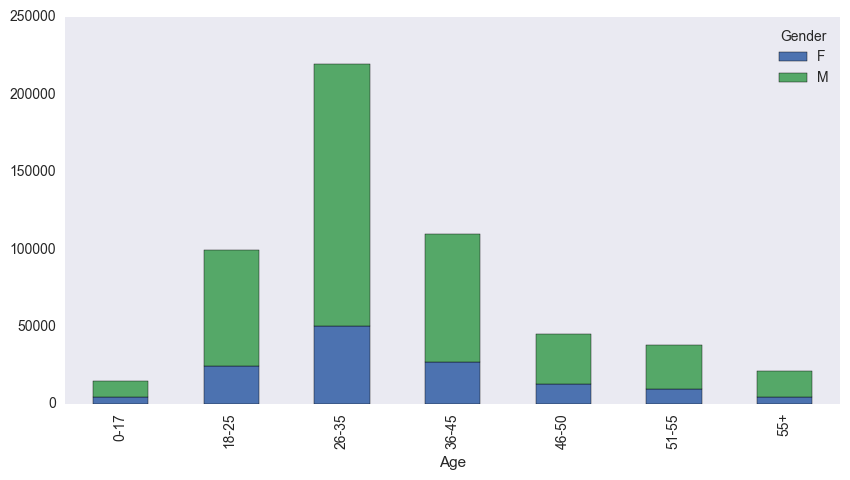

In [29]:
## Stacked chart for visualization

var = train.groupby(['Age','Gender']).Gender.count()
var.unstack().plot(kind='bar',stacked=True, grid=False,figsize=(10,5))


In [21]:
## Chi-sq test

chi_AG = pd.crosstab(train['Gender'],train['Age'])
chi_AG

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,5083,24628,50752,27170,13199,9894,5083
M,10019,75032,168835,82843,32502,28607,16421


In [30]:
stats.chi2_contingency(chi_AG)

(1412.7156576195039,
 4.2750569064909935e-302,
 6,
 array([[   3728.60722311,   24605.54865944,   54214.9168521 ,
           27161.65186304,   11283.34516642,    9505.70167507,
            5309.22856083],
        [  11373.39277689,   75054.45134056,  165372.0831479 ,
           82851.34813696,   34417.65483358,   28995.29832493,
           16194.77143917]]))

                                     Gender & Age are dependent on each other

C:\Anaconda3\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


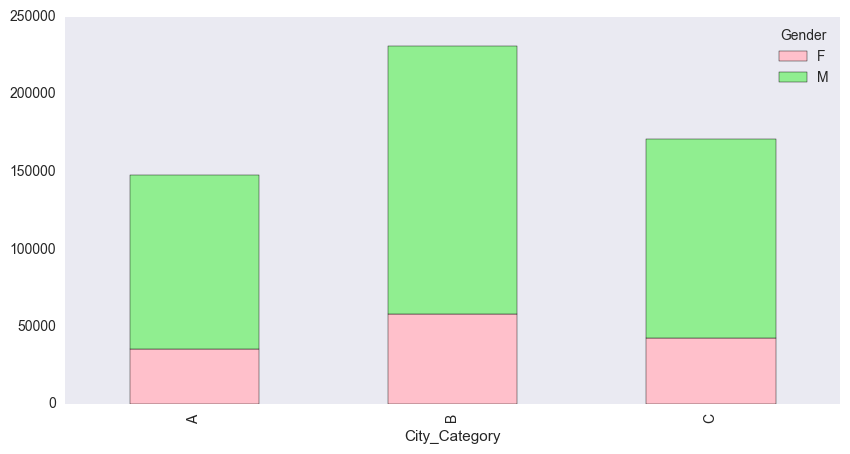

In [52]:
# stack 
var1 = train.groupby(['City_Category','Gender']).Gender.count()
var1.unstack().plot(kind='bar',stacked=True, grid=False,figsize=(10,5),color=['pink','lightgreen'])

In [33]:
## cross tab

chi_GC = pd.crosstab(train['Gender'],train['City_Category'])
chi_GC

City_Category,A,B,C
Gender,,,
F,35704,57796,42309
M,112016,173377,128866


In [34]:
stats.chi2_contingency(chi_GC)

(33.58382571304351,
 5.097590042852447e-08,
 2,
 array([[  36471.3189642,   57075.4415036,   42262.2395322],
        [ 111248.6810358,  174097.5584964,  128912.7604678]]))

                                              Gender & City_Category dependent

C:\Anaconda3\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


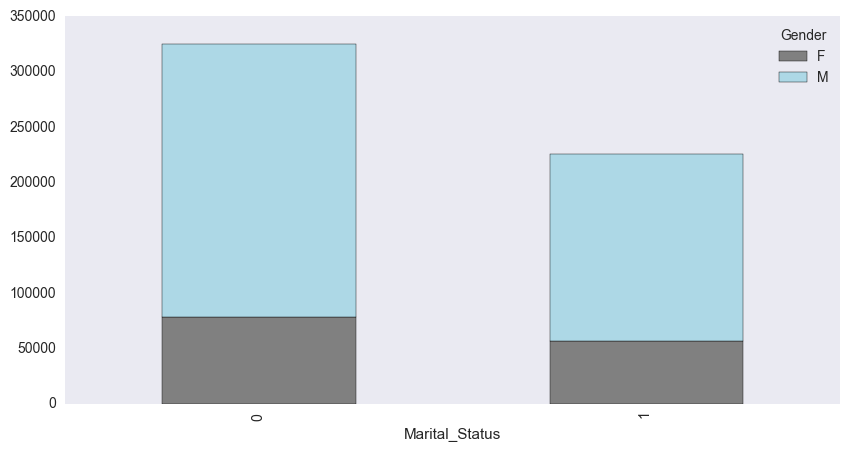

In [48]:
# stack 
var2 = train.groupby(['Marital_Status','Gender']).Gender.count()
var2.unstack().plot(kind='bar',stacked=True, grid=False,figsize=(10,5),color=['grey','lightblue'])

In [36]:
## cross tab

chi_Gm = pd.crosstab(train['Gender'],train['Marital_Status'])
chi_Gm

Marital_Status,0,1
Gender,,
F,78821,56988
M,245910,168349


In [37]:
stats.chi2_contingency(chi_Gm)

(74.002726975234722,
 7.8009189454074494e-18,
 1,
 array([[  80174.43730412,   55634.56269588],
        [ 244556.56269588,  169702.43730412]]))

_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________  

<a id='Outlier'></a>
## Outlier ##
Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**

Outlier can be of two types: Univariate and Multivariate. Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

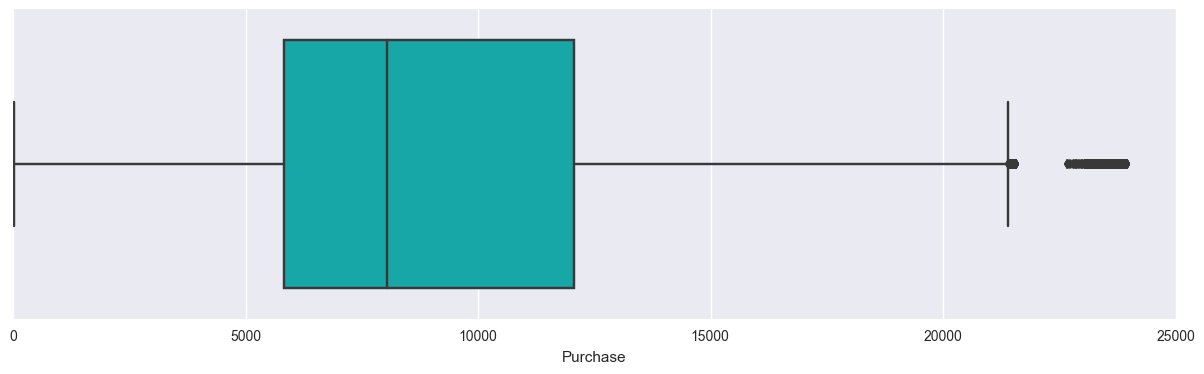

In [65]:
plt.figure(figsize=(15, 4))
sns.boxplot(train['Purchase'],color='c')

## Variable Transformation##
What are the common methods of Variable Transformation?

There are various methods used to transform variables. As discussed, some of them include square root, cube root, logarithmic, binning, reciprocal and many others. Let’s look at these methods in detail by highlighting the pros and cons of these transformation methods.

**Logarithm**: Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well.

**Square / Cube root**: The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero.

**Binning**: It is used to categorize variables. It is performed on original values, percentile or frequency. Decision of categorization technique is based on business understanding. For example, we can categorize income in three categories, namely: High, Average and Low. We can also perform co-variate binning which depends on the value of more than one variables.
 

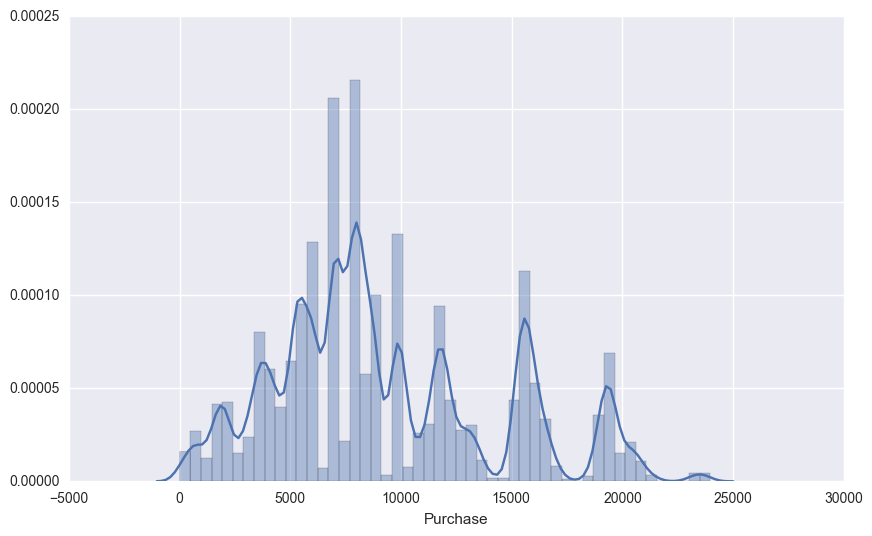

In [46]:
plt.figure(figsize=(10, 6))
sns.distplot(train['Purchase'])

# Data Preparation #

<a id='Label encoding'></a>
### Label Encoding ###


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data=train['User_ID'].append(test['User_ID'])

le.fit(data.values)
train['User_ID']=le.transform(train['User_ID'])
test['User_ID']=le.transform(test['User_ID'])

C:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data=train['Occupation'].append(test['Occupation'])

le.fit(data.values)
train['Occupation']=le.transform(train['Occupation'])
test['Occupation']=le.transform(test['Occupation'])

In [9]:
#Label Encoding

train_x = train.ix[:,[0,1,2,3,4,5,6,7,8,9,10,11]] #for subseting by index
test_x = test.ix[:,[1,2,3,4,5,6,7,8,9,10,11]]

#Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in train_x.columns.values:
    # Encoding only categorical variables
    if train_x[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=train_x[col].append(test_x[col])
        le.fit(data.values)
        train_x[col]=le.transform(train_x[col])
        test_x[col]=le.transform(test_x[col])

C:\Users\Thoshiba\AppData\Roaming\Python\Python35\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<a id='Dummy Variables'></a>
### Dummy Variables ###

In [12]:
## Create dummy variables 

train_x = pd.get_dummies(train_x, columns=['City_Category','Age','Stay_In_Current_City_Years'])
test_x = pd.get_dummies(test_x, columns=['City_Category','Age','Stay_In_Current_City_Years'])
print (train_x.shape)
print (test_x.shape)

(550068, 24)
(233599, 23)


<a id='Data Spliting'></a>
## Data Spliting ##

In [10]:
### Convert User ID & Product_ID in 
train['User_ID'] = train['User_ID'].astype('category')
test['User_ID'] = test['User_ID'].astype('category')
train['Product_ID'] = train['Product_ID'].astype('category')
train['User_ID'] = test['Product_ID'].astype('category')

In [48]:
#from sklearn.cross_validation import train_test_split
#x_train,x_test = train_test_split(train,test_size=0.30)

In [11]:
## Split the data for to check the accuracy

from sklearn.cross_validation import train_test_split
x_train,x_test = train_test_split(train_x,test_size=0.30)

In [12]:
print (x_train.shape)
print (x_test.shape)

(385047, 12)
(165021, 12)


In [13]:
x_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
415252,3791,2413,1,2,20,0,0,0,3,5,14,10756
433761,776,980,0,2,20,2,4,0,1,2,15,12063
57240,2770,3642,1,2,0,2,1,1,3,4,12,8415
423515,5051,840,1,3,11,2,1,1,5,6,14,8760
16096,2390,31,1,3,1,1,1,0,8,15,14,5875


_________________________________________________________________________________________________________________________________

<a id='Regression'></a>
## Linear Regression ##
- Without Dummy Variables
- With Dummy Variables
                                                         

In [24]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Purchase ~Age_0+Age_1+Age_2+Age_3+Age_4+Age_5+Age_6+Gender+Occupation+Product_ID+City_Category_0+City_Category_1+City_Category_2+City_Category_0+Product_Category_1+Stay_In_Current_City_Years_0+Stay_In_Current_City_Years_1+Stay_In_Current_City_Years_2+Stay_In_Current_City_Years_3+Stay_In_Current_City_Years_4+Product_Category_2+Product_Category_3', data=x_train).fit()

# print the coefficients
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     3305.
Date:                Thu, 13 Oct 2016   Prob (F-statistic):               0.00
Time:                        17:07:31   Log-Likelihood:            -3.8002e+06
No. Observations:              385047   AIC:                         7.601e+06
Df Residuals:                  385028   BIC:                         7.601e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept       

In [25]:
## Accuracy for full model

predict = lm.predict(x_test)
MSE =  np.mean((x_test['Purchase'] - predict) ** 2)
print("calculate RMSE: %.2f"  %np.sqrt(MSE))

calculate RMSE: 4660.09


 we will remove ***Stay_In_Current_City_Years*** variable because it is having p-value more than 0.05 which says it is not a significant variable in our model.

In [36]:
## Removing Stay_In_Current_City_Years & Marital Status

# create a fitted model in one line
lm1 = smf.ols(formula='Purchase ~Age_0+Age_1+Age_2+Age_3+Age_4+Age_5+Age_6+Gender+Occupation+Product_ID+City_Category_0+City_Category_1+City_Category_0+Product_Category_1+Product_Category_2+Product_Category_3', data=x_train).fit()

# print the coefficients
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4248.
Date:                Thu, 13 Oct 2016   Prob (F-statistic):               0.00
Time:                        17:42:04   Log-Likelihood:            -3.8002e+06
No. Observations:              385047   AIC:                         7.601e+06
Df Residuals:                  385032   BIC:                         7.601e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           1.128e+04     43

In [37]:
## Accuracy for model without Stay_In_Current_City_Years
predict0=lm1.predict(x_train)
predict1 = lm1.predict(x_test)
MSE1 =  np.mean((x_test['Purchase'] - predict1) ** 2)
print("calculate RMSE: %.2f"  %np.sqrt(MSE1))

## No change in RMSE 

calculate RMSE: 4660.12


### High Leverage Plot ###

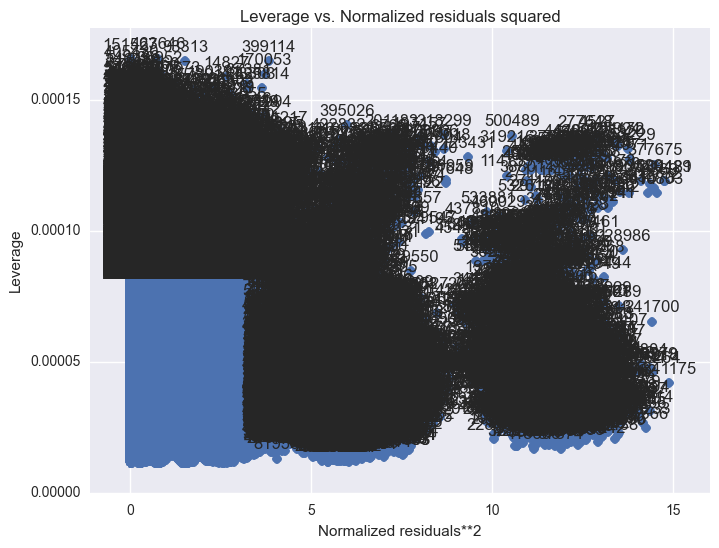

In [38]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(lm1, ax = ax)

### Residual Plot ###

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


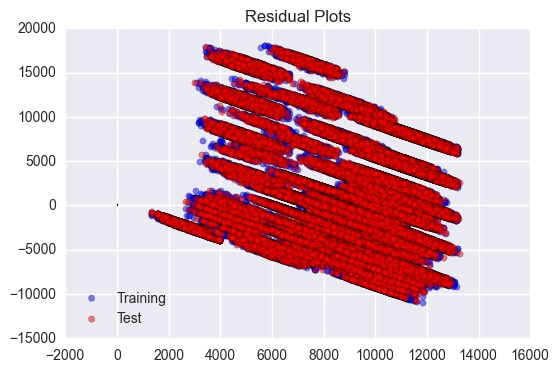

In [31]:


# Scatter plot the training data
train = plt.scatter(predict0,(x_train['Purchase']-predict0),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(predict1,(x_test['Purchase']-predict1),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')



We will bulid our model on full train and predict on test

In [172]:
train_x.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,684,0,0,10,0,2,0,3,9,14,8370
1,2406,0,0,10,0,2,0,1,6,14,15200
2,868,0,0,10,0,2,0,12,9,14,1422
3,844,0,0,10,0,2,0,12,14,14,1057
4,2769,1,6,16,2,4,0,8,9,14,7969


In [217]:
import statsmodels.formula.api as smf

In [82]:
# create X and y
feature_cols = ['Age','Gender','Occupation','Product_ID','City_Category','Product_Category_1','Product_Category_2','Product_Category_3']

X = train_x[feature_cols]
y = train_x['Purchase']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)


C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
## Take only the feature used in model buliding
test_xp = test_x[feature_cols]

In [89]:

# Predict on test
prediction = lm.predict(test_xp)

# Save into DataFrame
output = pd.DataFrame( data={"User_ID":test["User_ID"], "Product_ID":test['Product_ID'],"Purchase":prediction} )

# Use pandas to write the comma-separated output file
output.to_csv( "G:/Black Friday/Reg_Model1.csv", index=False,)

  
We had removed Stay_years & Marital status variable from the model we got **RMSE: 4671.76** for training model and for complete model we got **RMSE: 4689.54** on Public LB & 115th Rank.                                                                             
We will use different alogrithm to improve our accuracy.
  

In [40]:
train_x.shape

(550068, 23)

### Model with Dummy variables ###

In [10]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm_full = smf.ols(formula='Purchase ~Age_0+Age_1+Age_2+Age_3+Age_4+Age_5+Age_6+Gender+Occupation+Product_ID+City_Category_0+City_Category_1+City_Category_0+Product_Category_1+Product_Category_2+Product_Category_3', data=train_x).fit()

# print the coefficients
print (lm_full.summary())

# Predict on test
prediction = lm_full.predict(test_x)

# Save into DataFrame
output = pd.DataFrame( data={"User_ID":test["User_ID"], "Product_ID":test['Product_ID'],"Purchase":prediction} )

# Use pandas to write the comma-separated output file
output.to_csv( "G:/Black Friday/Reg_Model_dummy.csv", index=False,)

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     6116.
Date:                Thu, 13 Oct 2016   Prob (F-statistic):               0.00
Time:                        20:02:07   Log-Likelihood:            -5.4283e+06
No. Observations:              550068   AIC:                         1.086e+07
Df Residuals:                  550053   BIC:                         1.086e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           1.132e+04     36

We got **RMSE 4687. 54**. There was a decrease of 2 with using dummy variables in model.

__________________________________________________________________________________________________________________________________

<a id='Decision Tree'></a>
## Decision Tree Regression ##

In [48]:
## Data Preparation for tree
feature = ['Age_0','Age_1','Age_2','Age_3','Age_4','Age_5','Age_6','Gender','Occupation','Product_ID','City_Category_0','City_Category_1','City_Category_0','Product_Category_1','Product_Category_2','Product_Category_3']
x = x_train[feature]
y = x_train['Purchase']
testx = x_test[feature]
testy = x_test['Purchase']

## full data subsetting
x_main = train_x[feature]
y_main = train_x['Purchase']
xt_main = test_x[feature]

In [27]:
from sklearn import tree

## Model fitting
tree = tree.DecisionTreeRegressor(max_depth = 7)
model_tree = tree.fit(x, y)

## Predict
predict_tree = model_tree.predict(testx)

## Evalute
MSE =  np.mean((testy - predict_tree) ** 2)
print("calculate RMSE: %.2f"  %np.sqrt(MSE))


calculate RMSE: 2886.41


RMSE reduce from **4460** to **3841** and when we used Depth = 7 then RMSE was 2886.41

________________________________________________________________________________________________________________________________

<a id='Random Forest'></a>
## Random Forest Regression ##

In [47]:
from sklearn.ensemble import RandomForestRegressor

## Model fitting
tree_rf = RandomForestRegressor(max_depth=7,n_estimators=100,verbose = 1)

model_tree_rf = tree_rf.fit(x,y)

## Predict
predict_tree = model_tree_rf.predict(testx)

## Evalute
MSE =  np.mean((testy - predict_tree) ** 2)
print("calculate RMSE: %.2f"  %np.sqrt(MSE))

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\sit

calculate RMSE: 2878.08


After using Random Forest RMSE was further reduced to **2878.08** on validation set

In [51]:

tree_rf = RandomForestRegressor(max_depth=7,n_estimators=200,verbose = 1)

# Full model fitting with Random forest
model_rffull = tree_rf.fit(x_main,y_main)

# Predict
prediction = model_rffull.predict(xt_main)

## submission
# Save into DataFrame
output = pd.DataFrame( data={"User_ID":test["User_ID"], "Product_ID":test['Product_ID'],"Purchase":prediction} )

# Use pandas to write the comma-separated output file
output.to_csv( "G:/Black Friday/RandF_Model_dummy200.csv", index=False,)

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\sit

- Got RMSE: **2897.11** Rank 63 with *100 trees* and *depth 7* .                                                                     
- Got RMSE: **2897.05** Rank 63 with *200 trees* and *depth 7* .


In [15]:
## Data Preparation for tree
feature = ['Age_0','Age_1','Age_2','Age_3','Age_4','Age_5','Age_6','Gender','User_ID','Product_ID','City_Category_0','City_Category_1','City_Category_0','Product_Category_1','Product_Category_2','Product_Category_3']
x = x_train[feature]
y = x_train['Purchase']
testx = x_test[feature]
testy = x_test['Purchase']

## full data subsetting
x_main = train_x[feature]
y_main = train_x['Purchase']
xt_main = test_x[feature]

In [16]:
from sklearn.ensemble import RandomForestRegressor

## Model fitting
tree_rf = RandomForestRegressor(max_depth=10,n_estimators=100,verbose = 1)

model_tree_rf = tree_rf.fit(x,y)

## Predict
predict_tree = model_tree_rf.predict(testx)

## Evalute
MSE =  np.mean((testy - predict_tree) ** 2)
print("calculate RMSE: %.2f"  %np.sqrt(MSE))

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\sit

calculate RMSE: 2791.86


In [17]:
from sklearn.ensemble import RandomForestRegressor

## Model fitting
tree_rf = RandomForestRegressor(max_depth=10,n_estimators=100,verbose = 1)

# Full model fitting with Random forest
model_rffull = tree_rf.fit(x_main,y_main)

# Predict
prediction = model_rffull.predict(xt_main)

## submission
# Save into DataFrame
output = pd.DataFrame( data={"User_ID":test1["User_ID"], "Product_ID":test1['Product_ID'],"Purchase":prediction} )

# Use pandas to write the comma-separated output file
output.to_csv( "G:/Black Friday/RandForest_Model.csv", index=False,)

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\sit

**RMSE : 2809.8093** when we used User_ID. 
Rank 52

________________________________________________________________________________________________________________________________

<a id='Gredient Boosting with H2O'></a>
# Gredient Boosting with H2O #


In [14]:
## We will import h2o and initialize it
import h2o

In [16]:
h2o.init(nthreads=-1)
from h2o.estimators.gbm import H2OGradientBoostingEstimator

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,25 secs
H2O cluster version:,3.10.0.8
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_Thoshiba_0cc3jf
H2O cluster total nodes:,1
H2O cluster free memory:,238.0 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [17]:
## Data Preparation for h2o 

#feature = ['Age_0','Age_1','Age_2','Age_3','Age_4','Age_5','Age_6','Gender','User_ID','Product_ID','City_Category_0','City_Category_1','Product_Category_1','Product_Category_2','Product_Category_3']
feature =['User_ID','Product_ID']
x = x_train
x_train_h2o = h2o.H2OFrame(x)

testx = x_test
x_test_h2o = h2o.H2OFrame(testx)

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [50]:
## GBM model fit
gbm_regressor = H2OGradientBoostingEstimator(distribution="gaussian",ntrees=500, max_depth=3,learn_rate=0.04,nbins_cats = 5891)

model_gbm = gbm_regressor.train(x=feature, y='Purchase',training_frame=x_train_h2o)

print (gbm_regressor) ## check the model details

gbm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1476449751808_7
Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,500.0,500.0,821648.0,0.0,3.0,1.524,1.0,8.0,4.534




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6596965.607527898
RMSE: 2568.455880004151
MAE: 1892.381958860219
RMSLE: 0.3400755659183268
Mean Residual Deviance: 6596965.607527898
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2016-10-14 19:43:29,0.010 sec,0.0,5024.1481080,4072.3908022,25242064.2116195
,2016-10-14 19:43:30,1.403 sec,1.0,4888.7193351,3957.1470133,23899576.7371800
,2016-10-14 19:43:31,2.257 sec,2.0,4759.6526057,3845.8745517,22654292.9270403
,2016-10-14 19:43:32,3.006 sec,3.0,4637.2441570,3738.4413732,21504033.3715118
,2016-10-14 19:43:32,3.657 sec,4.0,4521.0077711,3635.8974548,20439511.2659444
---,---,---,---,---,---,---
,2016-10-14 19:48:38,5 min 8.974 sec,307.0,2568.4558800,1892.3819589,6596965.6075279
,2016-10-14 19:48:42,5 min 13.750 sec,329.0,2568.4558800,1892.3819589,6596965.6075279
,2016-10-14 19:49:00,5 min 31.626 sec,337.0,2568.4558800,1892.3819589,6596965.6075279
,2016-10-14 19:49:17,5 min 48.397 sec,339.0,2568.4558800,1892.3819589,6596965.6075279



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Product_ID,94505831235584.0000000,1.0,0.9843716
User_ID,1500424568832.0000000,0.0158765,0.0156284


In [51]:
# Prediction
predict = gbm_regressor.predict(x_test_h2o)

# Copy predictions from H2O to Python
pred = predict.as_data_frame()

## Evalute
MSE =  np.mean((x_test['Purchase'] - pred['predict']) ** 2)
print("calculate RMSE: %.2f"  %np.sqrt(MSE))


gbm prediction progress: |████████████████████████████████████████████████████████████████████| 100%
calculate RMSE: 6562.28


#### Complete Fit  Model

In [ ]:
## Data preparation 
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(train)

# Parameters
gbm_regressor = H2OGradientBoostingEstimator(distribution="gaussian",ntrees=500, max_depth=3,learn_rate=0.04,nbins_cats = 5891)

# Model fit
model_gbm = gbm_regressor.train(x=feature, y='Purchase',training_frame=train_h2o)

# Model details
print (gbm_regressor)

# Prediction
predict = gbm_regressor.predict(test_h2o)

# Copy predictions from H2O to Python
pred = predict.as_data_frame()

# Make submission Dataframe 
output = pd.DataFrame( data={"User_ID":test1["User_ID"], "Product_ID":test1['Product_ID'],"Purchase":pred} )

# Use pandas to write the comma-separated output file
output.to_csv( "G:/Black Friday/GBM_Model.csv", index=False,)

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |██████████████████

__________________________________________________________________________________________________________________________________

# Deep Learning

In [22]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [38]:
h20_deeplearning =  H2ODeepLearningEstimator(activation = 'Rectifier',epochs=60,adaptive_rate =False)

In [32]:
feat=x_train_h2o.names[1:11]

In [ ]:
model_deep_learning = h20_deeplearning.train(x=feat, y='Purchase',training_frame=x_train_h2o)

deeplearning Model Build progress: |███